Files are loading ...

C:\Users\Mariana\Documents\Databases\APNEIA2\T01_1_BITALINO.csv


C:\Users\Mariana\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


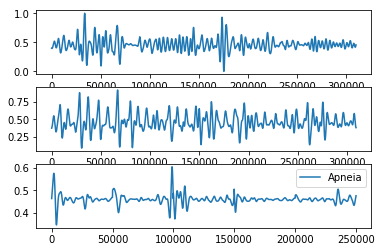

C:\Users\Mariana\Documents\Databases\APNEIA2\T02_1_BITALINO.csv


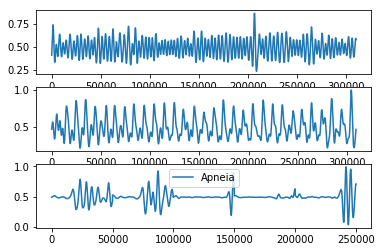

C:\Users\Mariana\Documents\Databases\APNEIA2\T02_3_BITALINO.csv


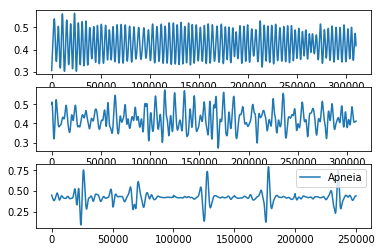

C:\Users\Mariana\Documents\Databases\APNEIA2\T02_6_BITALINO.csv


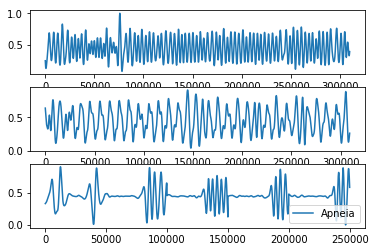

C:\Users\Mariana\Documents\Databases\APNEIA2\T02_7_BITALINO.csv


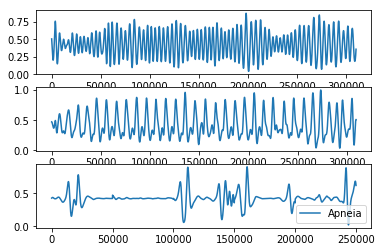

C:\Users\Mariana\Documents\Databases\APNEIA2\T02_8_BITALINO.csv


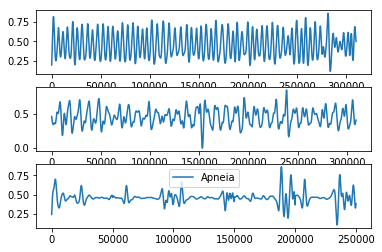

C:\Users\Mariana\Documents\Databases\APNEIA2\T03_2_BITALINO.csv


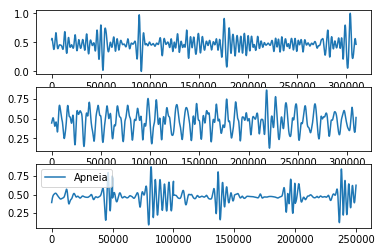

C:\Users\Mariana\Documents\Databases\APNEIA2\T03_4_BITALINO.csv


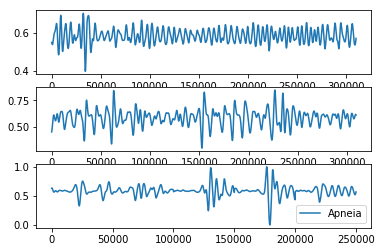

C:\Users\Mariana\Documents\Databases\APNEIA2\T03_5_BITALINO.csv


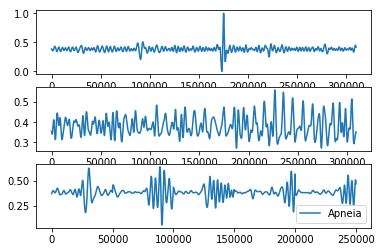

C:\Users\Mariana\Documents\Databases\APNEIA2\T03_6_BITALINO.csv


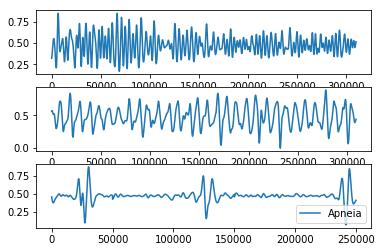

C:\Users\Mariana\Documents\Databases\APNEIA2\T03_8_BITALINO.csv


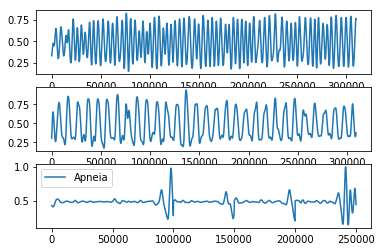

C:\Users\Mariana\Documents\Databases\APNEIA2\T04_1_BITALINO.csv


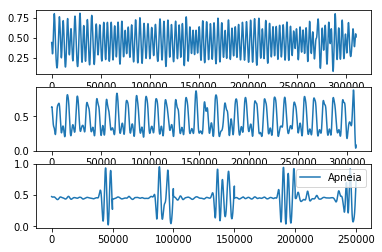

C:\Users\Mariana\Documents\Databases\APNEIA2\T04_2_BITALINO.csv


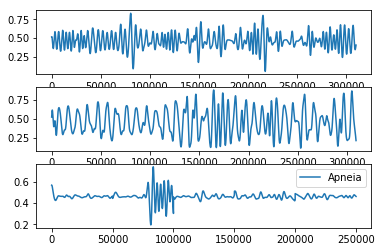

C:\Users\Mariana\Documents\Databases\APNEIA2\T04_4_BITALINO.csv


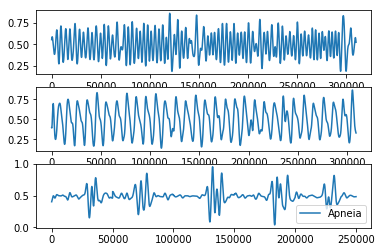

C:\Users\Mariana\Documents\Databases\APNEIA2\T04_5_BITALINO.csv


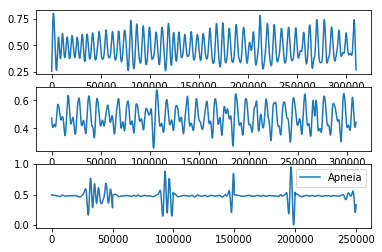

C:\Users\Mariana\Documents\Databases\APNEIA2\T04_6_BITALINO.csv


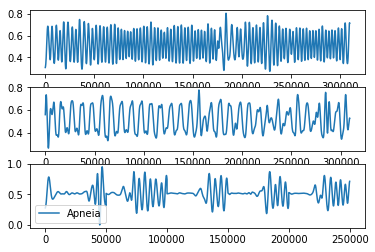

C:\Users\Mariana\Documents\Databases\APNEIA2\T05_3_BITALINO.csv


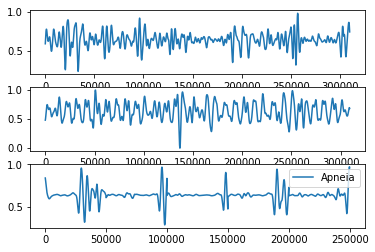

C:\Users\Mariana\Documents\Databases\APNEIA2\T05_5_BITALINO.csv


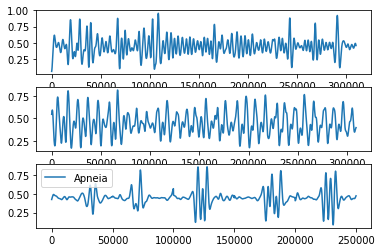

C:\Users\Mariana\Documents\Databases\APNEIA2\T05_6_BITALINO.csv


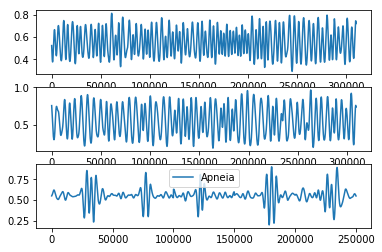

C:\Users\Mariana\Documents\Databases\APNEIA2\T05_8_BITALINO.csv


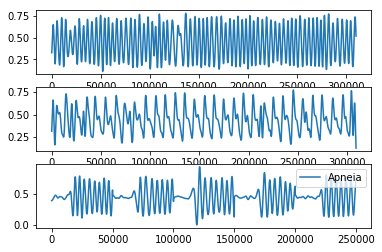

C:\Users\Mariana\Documents\Databases\APNEIA2\T06_1_BITALINO.csv


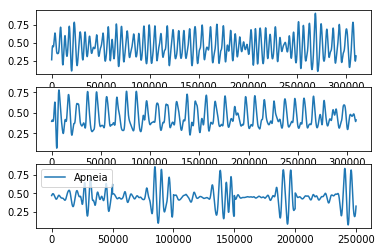

C:\Users\Mariana\Documents\Databases\APNEIA2\T06_3_BITALINO.csv


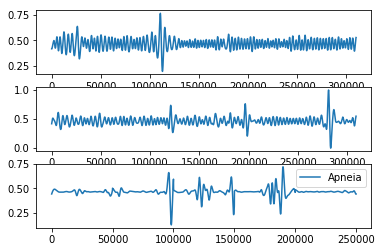

C:\Users\Mariana\Documents\Databases\APNEIA2\T06_4_BITALINO.csv


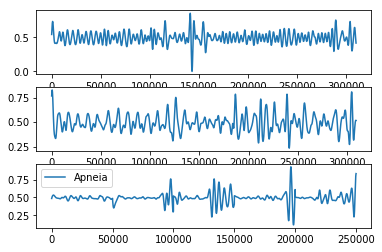

C:\Users\Mariana\Documents\Databases\APNEIA2\T06_6_BITALINO.csv


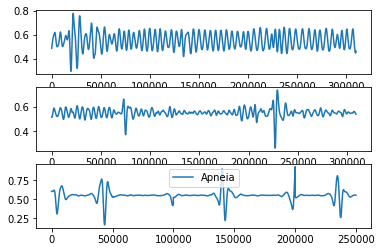

C:\Users\Mariana\Documents\Databases\APNEIA2\T06_8_BITALINO.csv


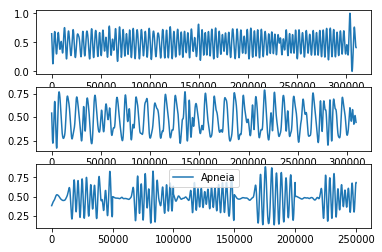

Finished
(25,) (25,)


In [18]:
import biosppy.signals as bp
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import pandas as pd
import os


# MinMax normalization between [-1,1]
def normal(sg):
    return (sg - np.min(sg)) / (np.max(sg) - np.min(sg))


def stand(sg):
    return (sg - np.mean(sg)) / np.std(sg)


folder = "C:\\Users\\Mariana\\Documents\\Databases\\APNEIA2\\"
# all_files = [folder+ol for ol in os.listdir(folder)]
all_files = [folder + ol for ol in os.listdir(folder)]
# samplint rate, window size of each sample
sampling_rate = 1000.
window = 30240
# percentage of the dataset that will be used for testing
div = 0
import matplotlib.pyplot as plt
import math

marker_label = dict([(2, 'Relax'), (5, 'Sinus'), (8, '1Ap'), (10, '2Ap'), (12, '3Ap'), (14, '4Ap'), (16, '5Ap')])

import time
import pylab as pl
from IPython import display
import tsfel as tsfel

#
def clean_signal(sig, label, sr = 1000., peak_th=0.1):
    total_peaks = find_extremes(sig,'max', 0.1)
    
    if 'Relax' or 'Sinus':
        if len(total_peaks) >= (win*peak_th)/sr: 
            print('This')
    
    
def find_extremes(sig, mode, th):
    indexes, values = bp.tools.find_extrema(sig, mode)
    ind, peaks = [],[]
    for pk in range(len(values)):
        if abs(values[pk]-np.mean(sig)) > float(th):
            ind += [indexes[pk]]
            peaks += [values[pk]] 
    return ind, peaks        

def load_timeseries(all_files, sr, win):
    x_train, x_test, y_train, y_test = [], [], [], []
    # ONLY ONE FILE
    print('Files are loading ...\n')

    for af in range(len(all_files)):
        print(all_files[af])
        df = pd.DataFrame.from_csv(all_files[af], parse_dates=True, index_col=0, header=0, sep=';')

        notnorm_X = bp.tools.filter_signal(df.A1, ftype='butter', band='bandpass', order=2, frequency=[0.1, 0.35], sampling_rate=sr)[
            'signal']
        
        X = normal(np.array(notnorm_X))
        #X = bp.resp.resp(df.A1,sampling_rate=sr, show=False)['zeros']
        # the vector is segmented into samples of fixed size 2000
        # the samples are resized to a length of 1024 to fit in the autoencoder


        X_cut = []
        list_marker = [[mk, marker] for mk, marker in enumerate(df.MARKER) if
                       marker != 0 and marker in marker_label.keys()]
        all_marker = np.concatenate([[list_marker[l][0], list_marker[l+1][0]]for l in range(0,len(list_marker)-1,2)])
#         plt.figure(figsize=(40,20))
#         f, fs = tsfel.plotfft(X[all_marker[0]:all_marker[1]], sr)
#         #plt.plot(range(all_marker[0],all_marker[1]),X[all_marker[0]:all_marker[1]])
#         plt.plot(f,fs)
#         plt.vlines(all_marker,np.min(X),np.max(X))

#         plt.show()
        first_X = X[all_marker[0]:all_marker[1]]
        sec_X = X[all_marker[2]:all_marker[3]]
        third_X = np.concatenate((X[all_marker[4]+10000:all_marker[5]-10000],X[all_marker[6]+10000:all_marker[7]-10000],
                                 X[all_marker[8]+10000:all_marker[9]-10000],X[all_marker[10]+10000:all_marker[11]-10000],
                                  X[all_marker[12]+10000:all_marker[13]-10000]))
#         from scipy.fftpack import fft
#         # Number of sample points
#         N = 600
#         # sample spacing
#         T = 1.0 / 800.0
#         x = np.linspace(0.0, N*T, N)
#         y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#         yf = fft(first_X)
#         pf = fft(sec_X)
#         lf = fft(third_X)
#         xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#         import matplotlib.pyplot as plt
#         plt.figure(figsize=(50,20))
#         plt.subplot(1,2,1)
#         plt.plot(xf, np.cumsum(2.0/N * np.abs(yf[0:N//2])), label='Relax')
#         plt.plot(xf, np.cumsum(2.0/N * np.abs(pf[0:N//2])), label='Sinus')
#         plt.plot(xf, np.cumsum(2.0/N * np.abs(lf[0:N//2])), label='Apneia')
#         plt.subplot(1,2,2)
        plt.subplot(3,1,1)
        
        plt.plot(first_X, label='Relax')
        
        plt.subplot(3,1,2)
        plt.plot(sec_X, label='Sinus')
        
        plt.subplot(3,1,3)
        plt.plot(third_X, label='Apneia')
        plt.legend()
        plt.show()
        
        for i in range(0, len(X) - win, win):
            #resamp = signal.resample(X[i:i + win], 1024)
            #resamp = X[i:i+win]
            lab = 'Nothing'
            resamp = normal(np.array(notnorm_X[i:i + win]))
            check2 = X[i:i+win]
            indexes, peaks = find_extremes(resamp, 'both', 0.1)
            minmax = np.diff(peaks)            
            if float('nan') in signal.resample(X[i:i + win], 1024):
                print(resamp)

            if i > list_marker[0][0] and (i+win) < list_marker[1][0]:
                if X_cut == []:
                    X_cut = [resamp]
                    Y_ = [0]
                else:
                    X_cut += [resamp]
                    Y_ += [0]
                lab = 'Relax'

            if i > list_marker[2][0] and (i+win) < list_marker[3][0]:
                X_cut += [resamp]
                Y_ += [1]
                lab = 'Sinus'
            if i > list_marker[4][0] and (i+win) < list_marker[5][0] or i > list_marker[6][0] and (i+win) < \
                    list_marker[7][0] or i > list_marker[8][0] and (i+win) < list_marker[9][0] or i > list_marker[10][
                0] and (i+win) < list_marker[11][0] or i > list_marker[12][0] and (i+win) < list_marker[13][0]:
                # if np.std(resamp) < 0.05:
                X_cut += [resamp]
                Y_ += [2]
                lab = 'Apneia'
            
           # if lab != 'Nothing':

#                 plt.cla()
#                 plt.plot(resamp, label=(np.mean(resamp), np.std(resamp), lab))
#                 plt.plot(check2, label=(np.mean(check2), np.std(check2), lab))
#                 plt.ylim(np.min(resamp),np.max(resamp))
#                 plt.legend()
#                 plt.scatter(indexes,peaks)
#                 display.display(pl.gcf())
#                 display.clear_output(wait=True) 
#                 time.sleep(1.0)

        x_train += [X_cut]
        y_train += [Y_]
        X_cut = []
    print('Finished')

    print(np.array(x_train).shape, np.array(y_train).shape)
    return np.array(x_train), np.array(y_train)

X, Y = load_timeseries(all_files, sampling_rate, window)
# import pickle
# with open(r"data.pickle", "wb") as output_file:
#     pickle.dump(X, output_file)
# with open(r"labels.pickle", "wb") as output_file:
#     pickle.dump(Y, output_file)


In [12]:
import pickle
with open(r"data.pickle", "wb") as output_file:
    pickle.dump(X, output_file)
with open(r"labels.pickle", "wb") as output_file:
    pickle.dump(Y, output_file)


In [16]:
import biosppy.signals as bp
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import pandas as pd
import os


# MinMax normalization between [-1,1]
def normal(sg):
    return (sg - np.min(sg)) / (np.max(sg) - np.min(sg))


def stand(sg):
    return (sg - np.mean(sg)) / np.std(sg)


folder = "C:\\Users\\Mariana\\Documents\\Databases\\APNEIA\\"
# all_files = [folder+ol for ol in os.listdir(folder)]
all_files = [folder + ol for ol in os.listdir(folder)]
# samplint rate, window size of each sample
sampling_rate = 1000.
window = 102400
# percentage of the dataset that will be used for testing
div = 0
import matplotlib.pyplot as plt
import math

marker_label = dict([(2, 'Relax'), (5, 'Sinus'), (8, '1Ap'), (10, '2Ap'), (12, '3Ap'), (14, '4Ap'), (16, '5Ap')])

import time
import pylab as pl
from IPython import display
import tsfel as tsfel

def clean_signal(sig, sr = 1000.):
    

def load_timeseries(all_files, sr, win):
    x_train, x_test, y_train, y_test = [], [], [], []
    # ONLY ONE FILE
    print('Files are loading ...\n')

    for af in range(len(all_files)):
        print(all_files[af])
        df = pd.DataFrame.from_csv(all_files[af], parse_dates=True, index_col=0, header=0, sep=';')

        X = bp.tools.filter_signal(df.A1, ftype='butter', band='bandpass', order=2, frequency=[0.1, 0.35], sampling_rate=sr)[
            'signal']
        X = normal(np.array(X))
        #X = bp.resp.resp(df.A1,sampling_rate=sr, show=False)['zeros']
        # the vector is segmented into samples of fixed size 2000
        # the samples are resized to a length of 1024 to fit in the autoencoder


        X_cut = []
        list_marker = [[mk, marker] for mk, marker in enumerate(df.MARKER) if
                       marker != 0 and marker in marker_label.keys()]
        all_marker = np.concatenate([[list_marker[l][0], list_marker[l+1][0]]for l in range(0,len(list_marker)-1,2)])
#         plt.figure(figsize=(40,20))
#         f, fs = tsfel.plotfft(X[all_marker[0]:all_marker[1]], sr)
#         #plt.plot(range(all_marker[0],all_marker[1]),X[all_marker[0]:all_marker[1]])
#         plt.plot(f,fs)
#         plt.vlines(all_marker,np.min(X),np.max(X))

#         plt.show()
        first_X = X[all_marker[0]:all_marker[1]]
        sec_X = X[all_marker[2]:all_marker[3]]
        third_X = np.concatenate((X[all_marker[4]+10000:all_marker[5]-10000],X[all_marker[6]+10000:all_marker[7]-10000],
                                 X[all_marker[8]+10000:all_marker[9]-10000],X[all_marker[10]+10000:all_marker[11]-10000],
                                  X[all_marker[12]+10000:all_marker[13]-10000]))
        from scipy.fftpack import fft
        # Number of sample points
        N = 600
        # sample spacing
        T = 1.0 / 800.0
        x = np.linspace(0.0, N*T, N)
        y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
        yf = fft(first_X)
        pf = fft(sec_X)
        lf = fft(third_X)
        xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
        import matplotlib.pyplot as plt
        plt.figure(figsize=(40,10))
        plt.subplot(1,2,1)
        plt.plot(xf, np.cumsum(2.0/N * np.abs(yf[0:N//2])), label='Relax')
        plt.plot(xf, np.cumsum(2.0/N * np.abs(pf[0:N//2])), label='Sinus')
        plt.plot(xf, np.cumsum(2.0/N * np.abs(lf[0:N//2])), label='Apneia')
        plt.subplot(1,2,2)
        plt.plot(first_X, label='Relax')
        plt.plot(sec_X, label='Sinus')
        plt.plot(third_X, label='Apneia')
        plt.legend()
        plt.show()
        
        for i in range(0, len(X) - win, win):
            #resamp = signal.resample(X[i:i + win], 1024)
            resamp = X[i:i+win]
            #resamp = stand(np.array(X[i:i + win]))

            if float('nan') in signal.resample(X[i:i + win], 1024):
                print(resamp)

            if i > list_marker[0][0] and i < list_marker[1][0]:
                if X_cut == []:
                    X_cut = [resamp]
                    Y_ = [0]
                else:
                    X_cut += [resamp]
                    Y_ += [0]

            if i > list_marker[2][0] and i < list_marker[3][0]:
                X_cut += [resamp]
                Y_ += [1]
            if i > list_marker[4][0] + 10000 and i < list_marker[5][0] or i > list_marker[6][0] + 10000 and i < \
                    list_marker[7][0] or i > list_marker[8][0] + 10000 and i < list_marker[9][0] or i > list_marker[10][
                0] + 10000 and i < list_marker[11][0] or i > list_marker[12][0] + 10000 and i < list_marker[13][0]:
                # if np.std(resamp) < 0.05:
                X_cut += [resamp]
                Y_ += [2]

        x_train += [X_cut]
        y_train += [Y_]
        X_cut = []
    print('Finished')

    print(np.array(x_train).shape, np.array(y_train).shape)
    return np.array(x_train), np.array(y_train)

X, Y = load_timeseries(all_files, sampling_rate, window)
# import pickle
# with open(r"data.pickle", "wb") as output_file:
#     pickle.dump(X, output_file)
# with open(r"labels.pickle", "wb") as output_file:
#     pickle.dump(Y, output_file)


IndentationError: expected an indented block (<ipython-input-16-f11ea66bdda7>, line 39)

(26, 30240)


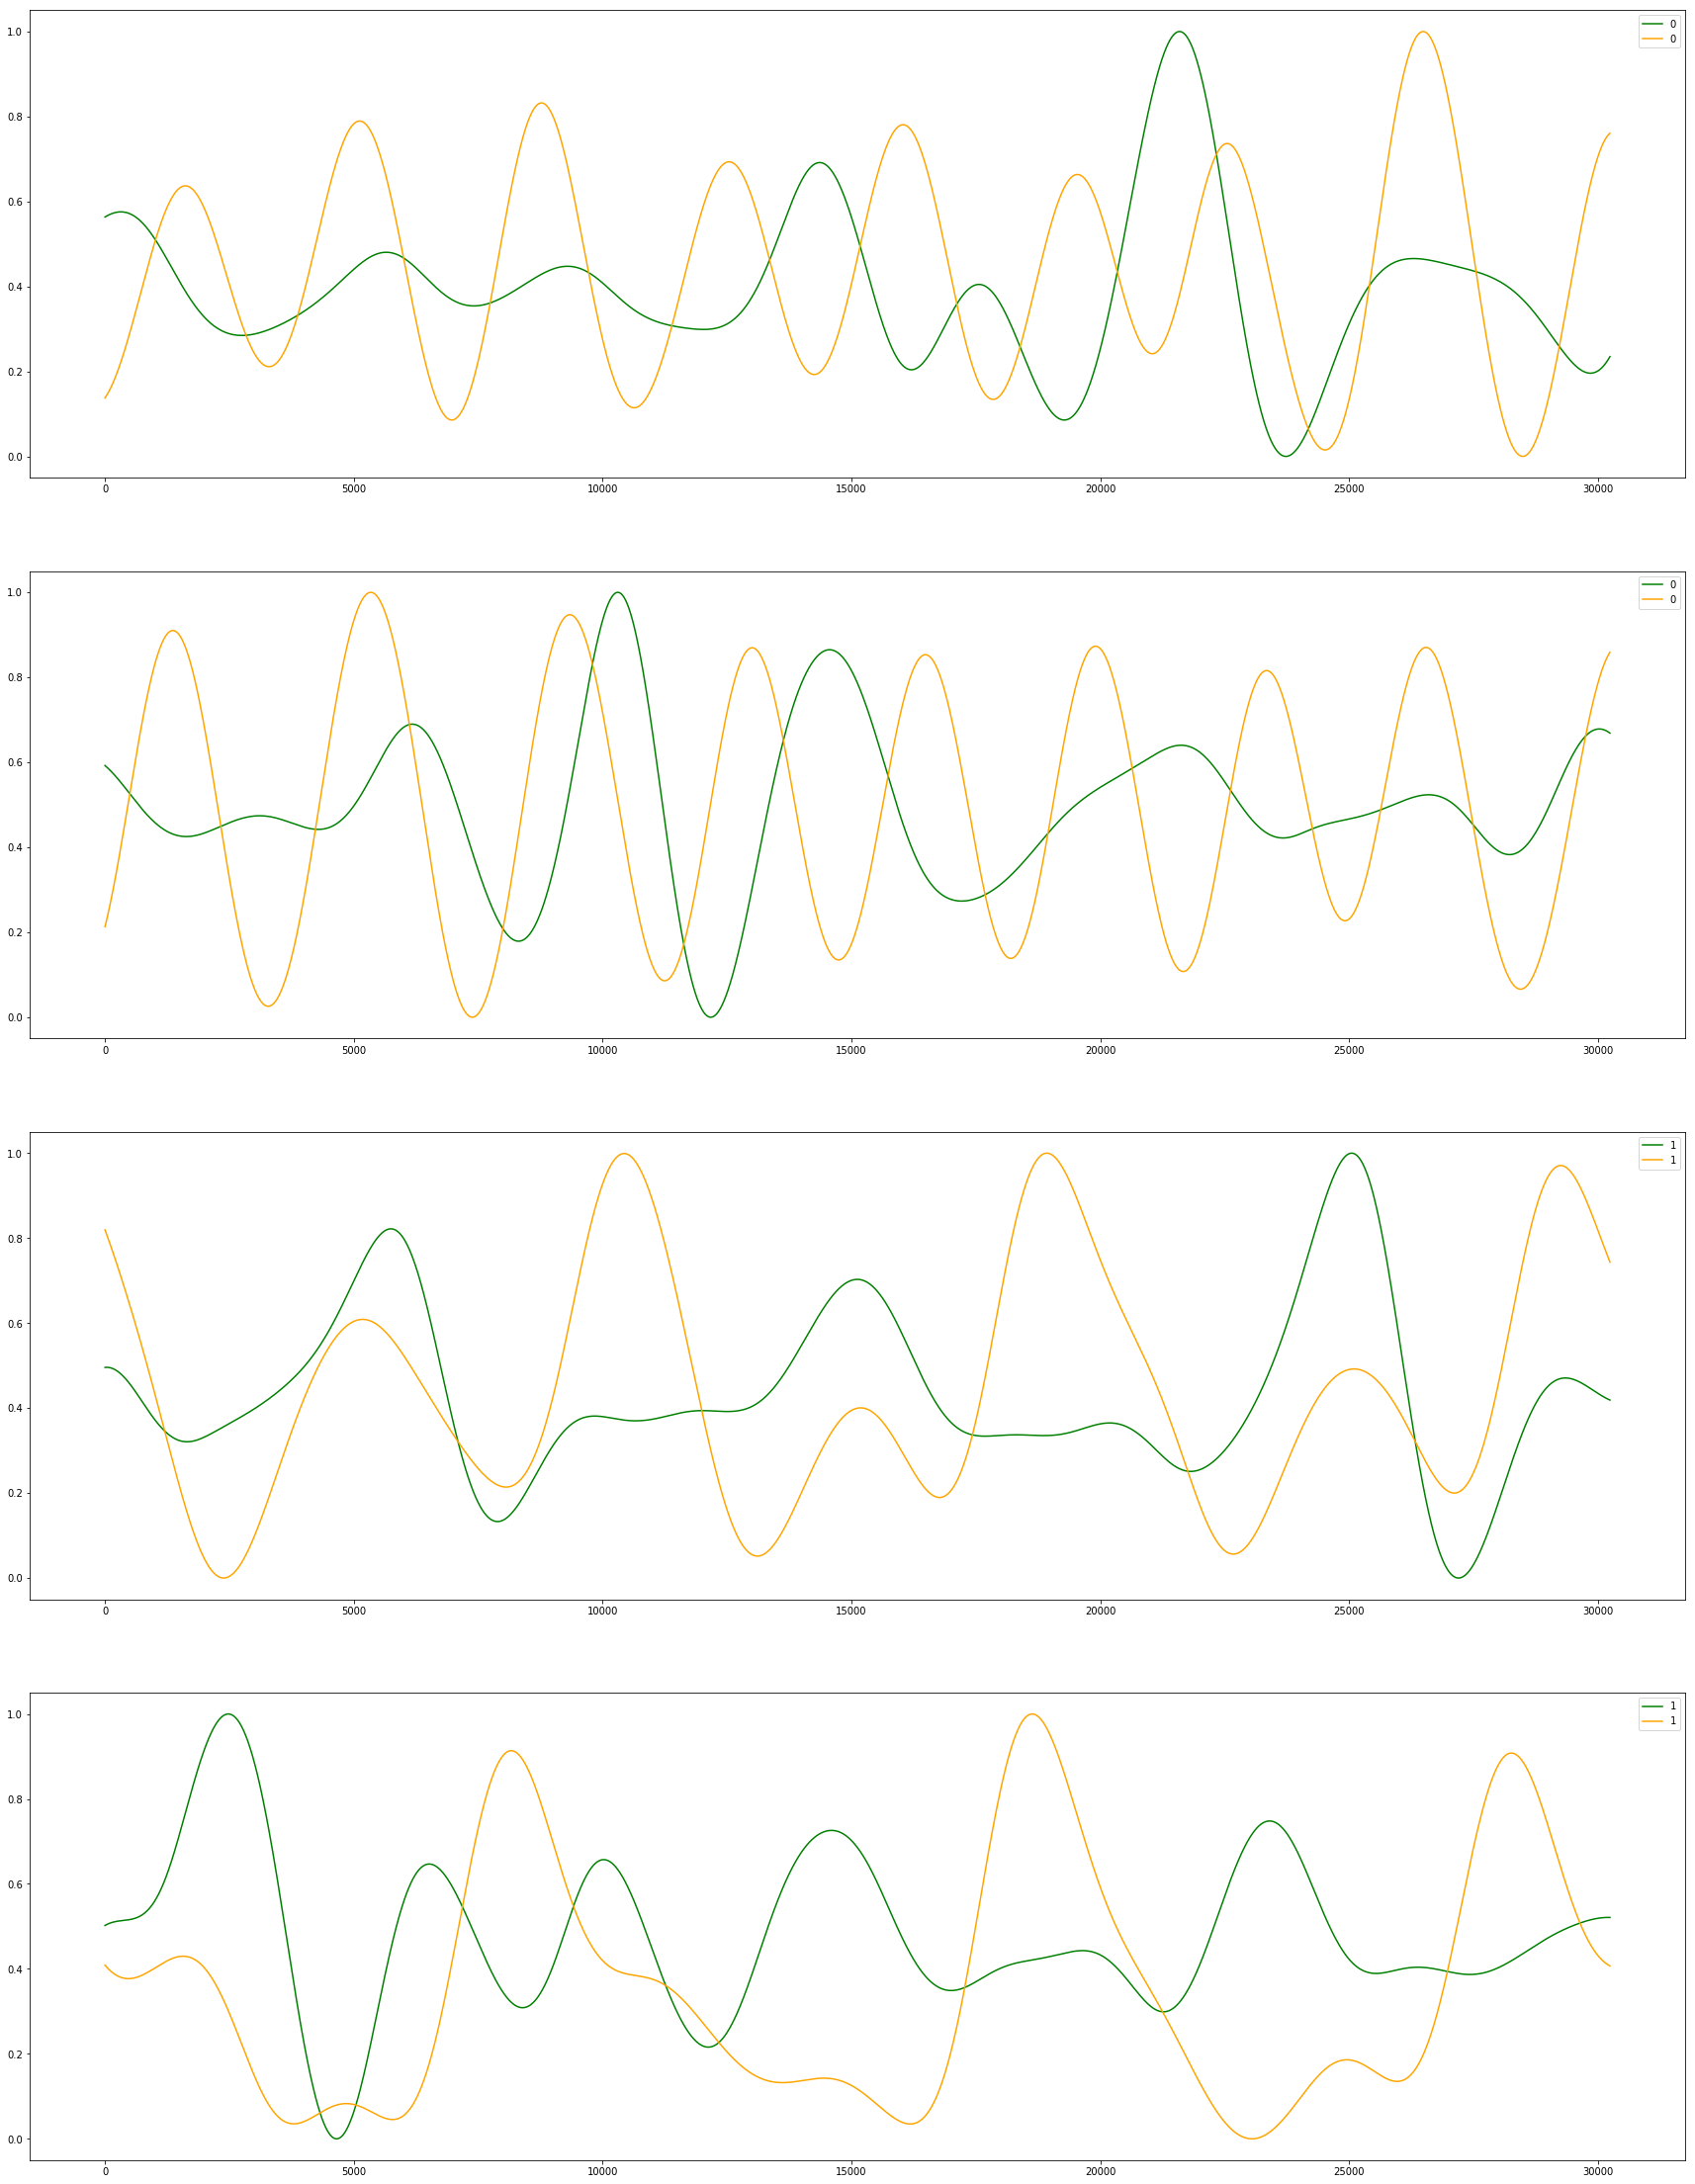

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,40))
print(np.array(X[0]).shape)

for i in range(len(X[3])//5):
    plt.subplot(len(X[3])//5,1,i+1)
    plt.plot(X[0][i*5], 'g', label=Y[0][i*5])
    plt.plot(X[1][i*5], 'orange', label=Y[1][i*5])
    plt.legend()

# for i in range(len(X[1])):
#     plt.subplot(len(X[1]),1,i+1)
#     plt.plot(X[1][i], 'b', label=Y[1][i])
#     plt.legend()
    
# for i in range(len(X[0])):
#     plt.subplot(len(X[0]),1,i+1)
#     plt.plot(X_notnorm[3][i], label=Y[3][i])
#     plt.legend()

# for i in range(len(X[1])):
#     plt.subplot(len(X[1]),1,i+1)
#     plt.plot(X_notnorm[1][i], label=Y[1][i])
#     plt.legend()

plt.show()




(26, 30240)


IndexError: list index out of range

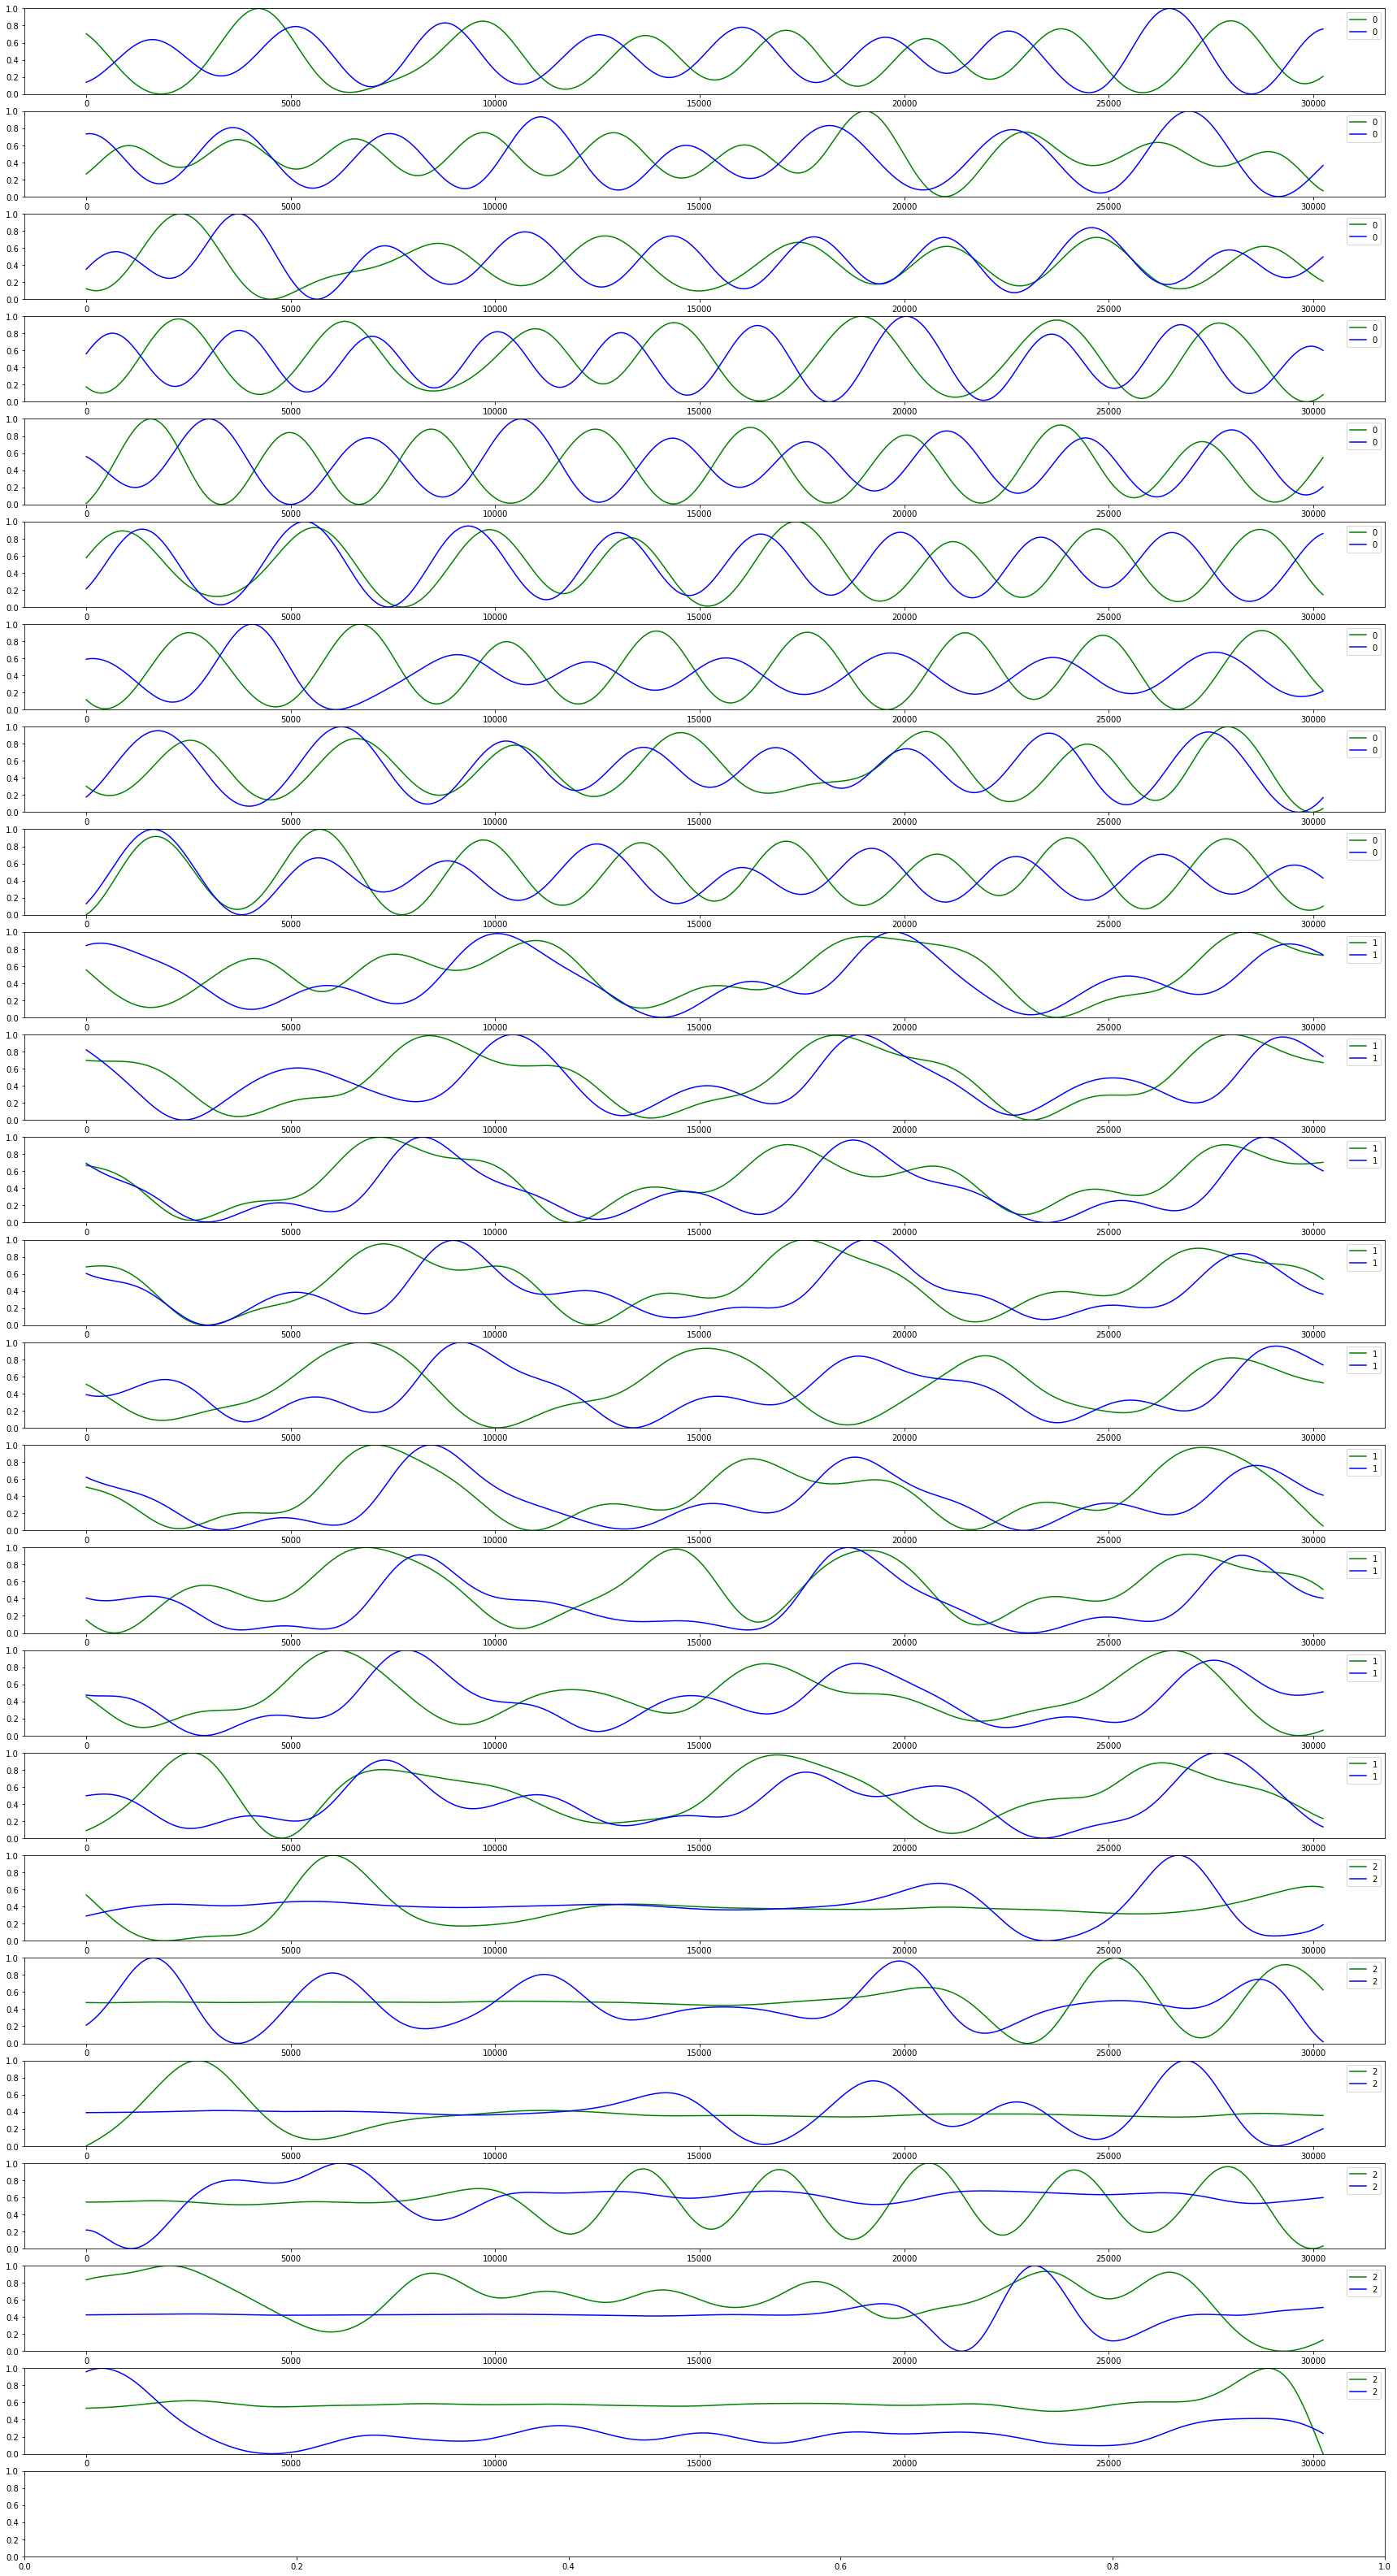

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,60))
print(np.array(X[0]).shape)

for i in range(len(X[0])):
    plt.subplot(len(X[0]),1,i+1)
    plt.plot(X[3][i], 'g', label=Y[3][i])
    plt.plot(X[1][i], 'b', label=Y[1][i])
    plt.ylim(0,1)
    plt.legend()

# for i in range(len(X[1])):
#     plt.subplot(len(X[1]),1,i+1)
#     plt.plot(X[1][i], 'b', label=Y[1][i])
#     plt.legend()
    
# for i in range(len(X[0])):
#     plt.subplot(len(X[0]),1,i+1)
#     plt.plot(X_notnorm[3][i], label=Y[3][i])
#     plt.legend()

# for i in range(len(X[1])):
#     plt.subplot(len(X[1]),1,i+1)
#     plt.plot(X_notnorm[1][i], label=Y[1][i])
#     plt.legend()

plt.show()


In [ ]:

X = pickle.load(open('data.pickle', 'rb'))
Y = pickle.load(open('labels.pickle', 'rb'))


def autoencoding_extract(signal):
    decoder = pickle.load(open('resp_decoder', 'rb'))
    encoder = pickle.load(open('resp_encoder', 'rb'))

    # x_ap_train, x_ap_test, labels_train, labels_test = load_timeseries(all_files, sampling_rate, window, div, filt = False, lab = 'resp')
    encoded_resp = encoder.predict(np.array(signal[:]))
    decoded_resp = decoder.predict(encoded_resp)

    return encoded_resp, decoded_resp


def autoencoded_data():
    E, D = [], []
    for xd in X:
        enc, dec = autoencoding_extract(xd)
        E += [enc]
        D += [dec]
    with open(r"dataE.pickle", "wb") as output_file:
        pickle.dump(E, output_file)
    with open(r"dataD.pickle", "wb") as output_file:
        pickle.dump(D, output_file)


#autoencoded_data()